In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         #print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pmdarima
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 28.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima.arima import OCSBTest 
from arch import arch_model
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
data=pd.read_csv('/kaggle/input/daily-gold-price-historical-data/gold.csv')

In [5]:
data.Date = pd.to_datetime(data.Date,dayfirst=True)
data.set_index('Date',inplace=True)
data = data.asfreq('b','ffill')
del data['Currency']
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,289.5,289.5,280.0,283.7,21621
2000-01-05,283.7,285.0,281.0,282.1,25448
2000-01-06,281.6,282.8,280.2,282.4,19055
2000-01-07,282.5,284.5,282.0,282.9,11266
2000-01-10,282.4,283.9,281.8,282.7,30603


In [6]:
data.describe()

,Open,High,Low,Close,Volume
count,5914.000000,5914.000000,5914.000000,5914.000000,5914.000000
mean,1038.826835,1046.783201,1030.325507,1038.764406,139219.708150
std,519.294993,522.932374,515.005988,519.082257,103366.087891
min,256.600000,259.400000,255.100000,256.600000,0.000000
25%,452.925000,455.425000,449.750000,453.050000,52326.500000
50%,1188.100000,1197.250000,1178.550000,1187.200000,125509.000000
75%,1380.500000,1391.775000,1367.225000,1380.500000,193311.500000
max,2076.400000,2089.200000,2049.000000,2069.400000,816531.000000


In [7]:
data = data[data.index > '2018']

In [8]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1305.3,1320.4,1304.6,1316.1,279727
2018-01-03,1319.0,1323.0,1308.9,1318.5,353457
2018-01-04,1315.5,1327.3,1307.1,1321.6,369850
2018-01-05,1324.4,1324.7,1314.6,1322.3,330225
2018-01-08,1321.8,1323.0,1315.7,1320.4,246086


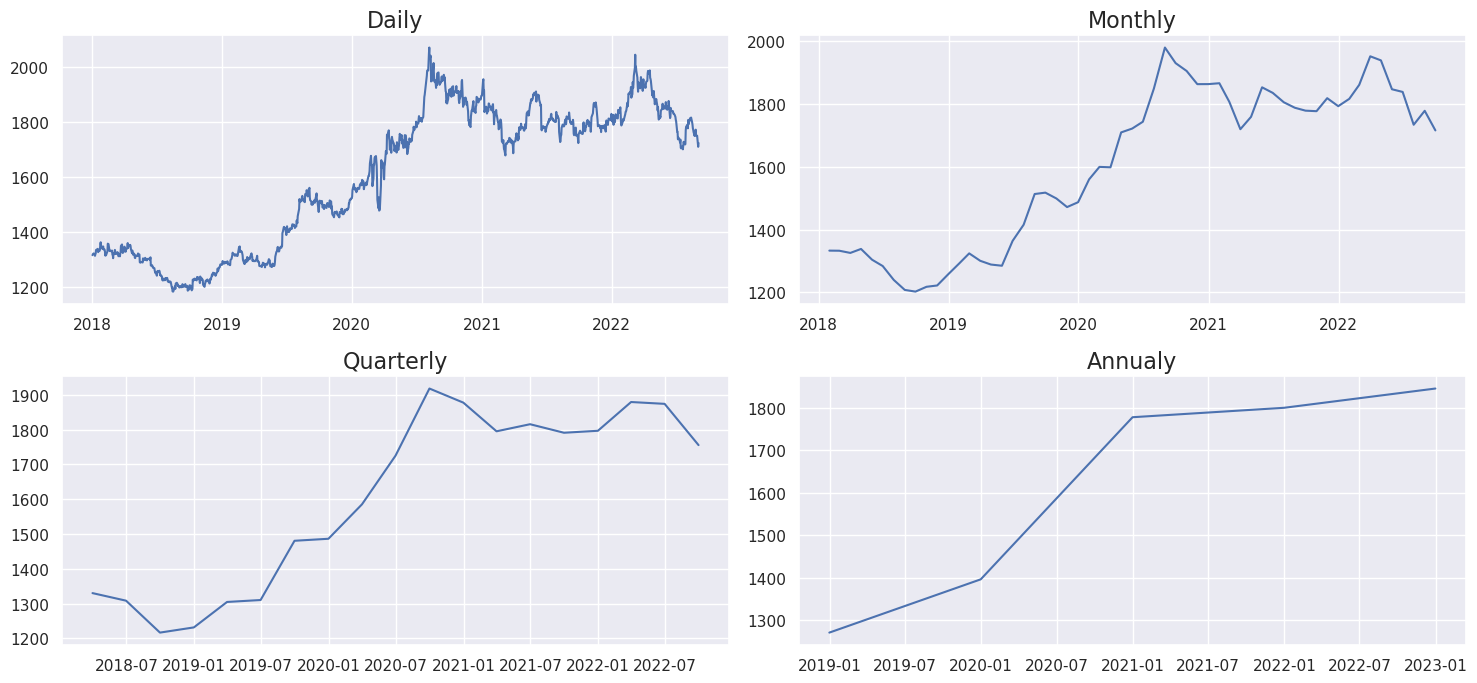

In [9]:
fig,axes = plt.subplots(2,2,figsize=[15,7])

## daily
axes[0,0].plot(data.Close)
axes[0,0].set_title("Daily",size=16)

## monthly
axes[0,1].plot(data.Close.resample('M').mean())
axes[0,1].set_title("Monthly",size=16)

## quarterly 
axes[1,0].plot(data.Close.resample('Q').mean())
axes[1,0].set_title('Quarterly',size=16)

## annualy
axes[1,1].plot(data.Close.resample('A').mean())
axes[1,1].set_title('Annualy',size=16)

plt.tight_layout()
plt.show()

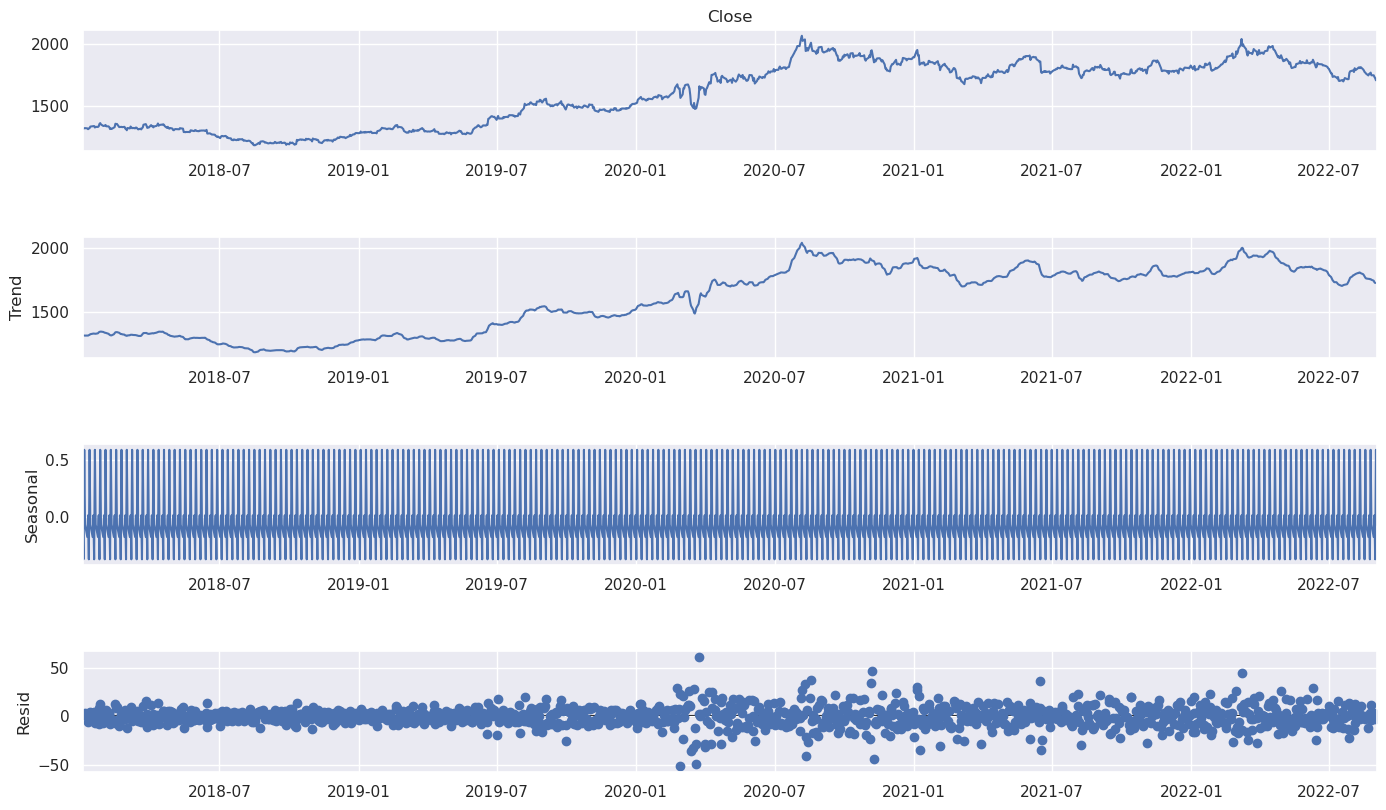

In [10]:
#Seasonality
decompose_result = seasonal_decompose(data['Close'])
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
fig=decompose_result.plot()
fig.set_size_inches((16, 9))

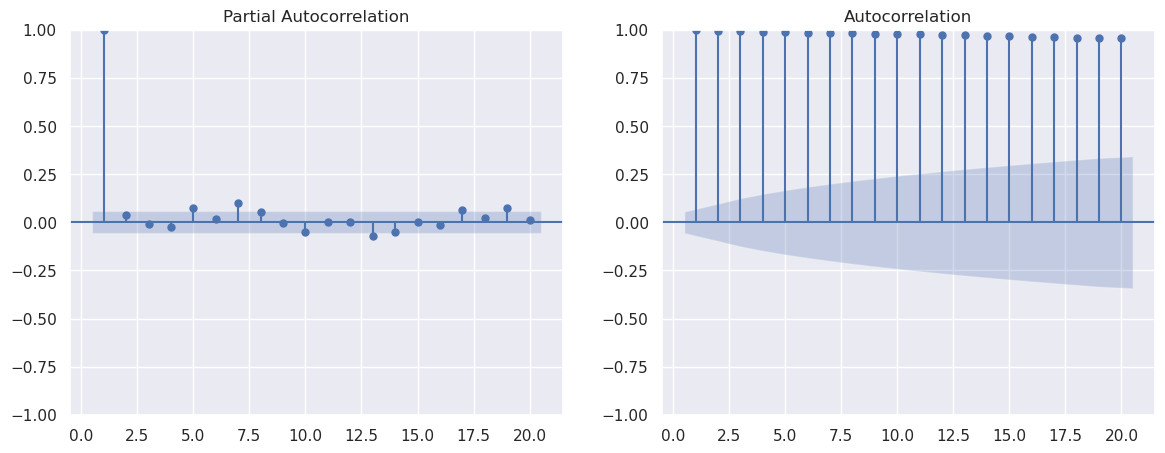

In [11]:
#Autocorrelation and Partial Autocorrelation
fig = plt.figure(figsize=(14,5))
ax_1 = fig.add_subplot(121)
plot_pacf(data.Close,lags=20,zero=False,ax=ax_1)
ax_2 = fig.add_subplot(122)
plot_acf(data.Close,lags=20,zero=False,ax=ax_2);

In [12]:
start_date = "2018-01-02" 
end_date = "2022-06-01"
final_day="2022-09-02"

In [13]:
 model = auto_arima(data.Close[start_date:end_date],
                        start_p=1, start_q=1,
                            max_p=20, max_q=20, m=20,
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[20]             : AIC=inf, Time=9.89 sec
 ARIMA(0,1,0)(0,1,0)[20]             : AIC=10325.529, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[20]             : AIC=10020.472, Time=0.84 sec
 ARIMA(0,1,1)(0,1,1)[20]             : AIC=inf, Time=2.94 sec
 ARIMA(1,1,0)(0,1,0)[20]             : AIC=10327.502, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[20]             : AIC=9903.245, Time=2.37 sec
 ARIMA(1,1,0)(2,1,1)[20]             : AIC=inf, Time=9.85 sec
 ARIMA(1,1,0)(1,1,1)[20]             : AIC=inf, Time=8.21 sec
 ARIMA(0,1,0)(2,1,0)[20]             : AIC=9902.051, Time=1.84 sec
 ARIMA(0,1,0)(1,1,0)[20]             : AIC=10018.638, Time=0.66 sec
 ARIMA(0,1,0)(2,1,1)[20]             : AIC=inf, Time=18.98 sec
 ARIMA(0,1,0)(1,1,1)[20]             : AIC=inf, Time=4.72 sec
 ARIMA(0,1,1)(2,1,0)[20]             : AIC=9903.253, Time=2.34 sec
 ARIMA(1,1,1)(2,1,0)[20]             : AIC=9905.226, Time=6.19 sec
 ARIMA(0,1,0)(2,1,0)[20] intercept   : AIC=9

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1152
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 20)   Log Likelihood               -4948.026
Date:                            Mon, 29 May 2023   AIC                           9902.051
Time:                                    23:27:03   BIC                           9917.144
Sample:                                01-02-2018   HQIC                          9907.753
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20      -0.6453      0.020    -32.191      0.000      -0.685      -0.606
ar.S.L40      -0.3189      0.023    -14.129      0.000      -0.363      -0.275
sigma2       366.2430      8.533     42.921      0.000     349.519     382.967
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):               990.32
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               4.42   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

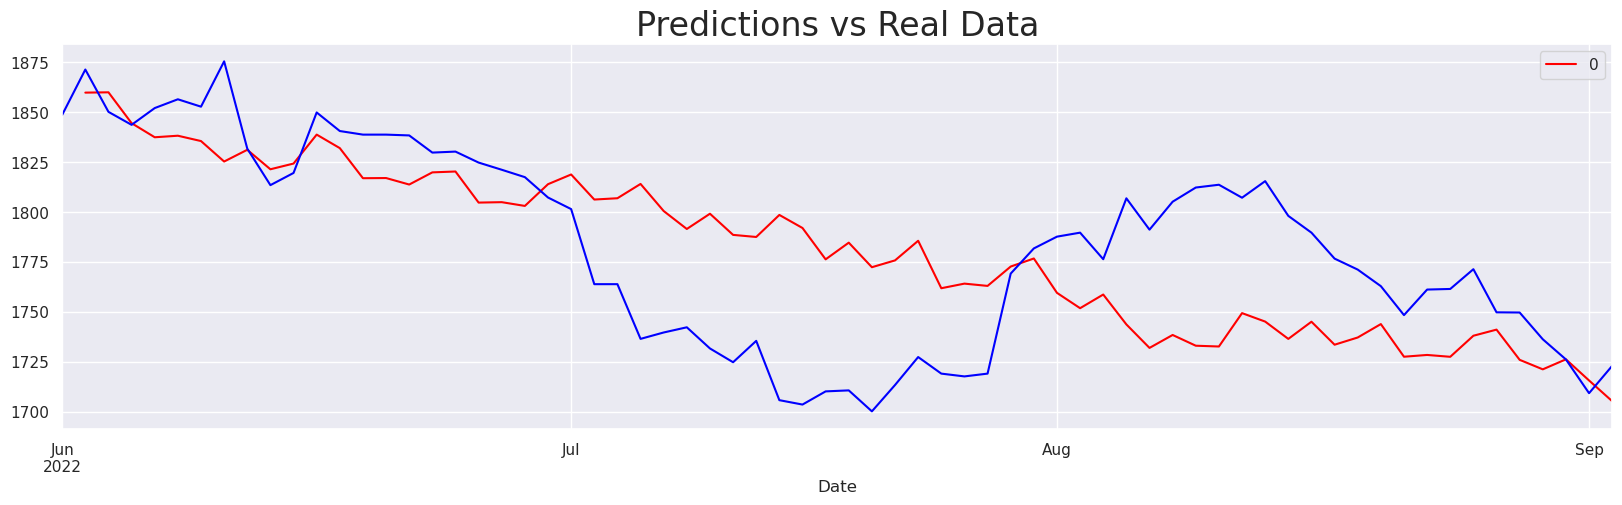

In [15]:
data_auto_pred_pr = pd.DataFrame(model.predict(n_periods = len(data[end_date:final_day])), index = data[end_date:final_day].index)
data_auto_pred_pr[end_date:final_day].plot(figsize = (20,5), color = "red")
data.Close[end_date:final_day].plot(color = "blue")
plt.title("Predictions vs Real Data", size = 24)
plt.show()